In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('/mnt/guanabana/raid/home/slomp006')

# LSTM
LSTM = pd.read_csv('Plotting/LSTM_jacc.csv')
Dense_LSTM = pd.read_csv('Plotting/Dense_LSTM_jacc.csv')

# LSTM-PostLSTM
LSTM_PostLSTM = pd.read_csv('Plotting/LSTM_PostLSTM_jacc.csv')
Dense_LSTM_PostLSTM = pd.read_csv('Plotting/Dense_LSTM_PostLSTM_jacc.csv')

# LSTM-Markov
LSTM_Markov = pd.read_csv('Plotting/LSTM_Markov_jacc.csv')
Dense_LSTM_Markov = pd.read_csv('Plotting/Dense_LSTM_Markov_jacc.csv')

# RF
RF = pd.read_csv('Plotting/RF_jacc.csv')
Dense_RF = pd.read_csv('Plotting/Dense_RF_jacc.csv')

# RF-PostLSTM
RF_PostLSTM = pd.read_csv('Plotting/RF_PostLSTM_jacc.csv')
Dense_RF_PostLSTM = pd.read_csv('Plotting/Dense_RF_PostLSTM_jacc.csv')

# RF-Markov
RF_Markov = pd.read_csv('Plotting/RF_Markov_jacc.csv')
Dense_RF_Markov = pd.read_csv('Plotting/Dense_RF_Markov_jacc.csv')

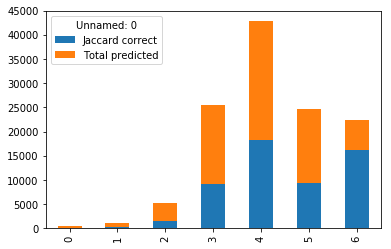

In [3]:
data = LSTM.copy()

df = pd.DataFrame(data)
df.set_index('Unnamed: 0', inplace=True)

# # Create the stacked bar chart
df.T.plot(kind='bar', stacked=True)

In [8]:
test = LSTM.copy()

test.iloc[0:2, :]

,Unnamed: 0,0,1,2,3,4,5,6
0,Correct,0,0,32,1086,5592,2975,14559
1,Missed,18,520,2799,7840,17657,35530,33348


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


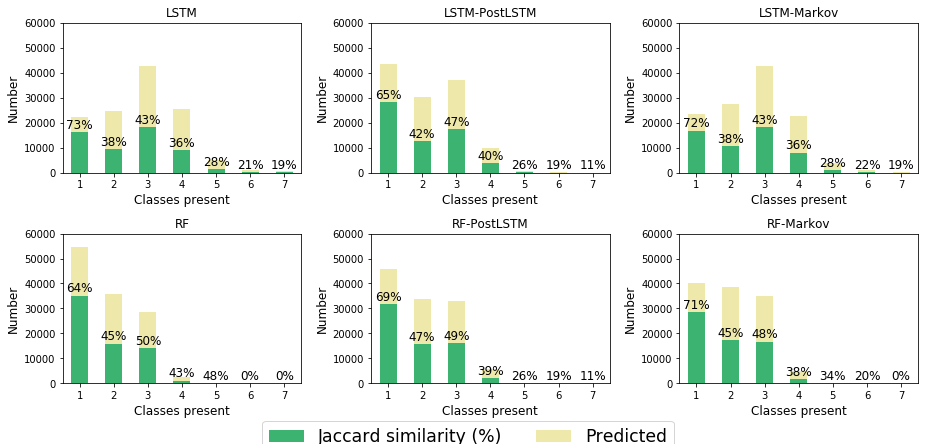

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data_frames = [LSTM, LSTM_PostLSTM, LSTM_Markov,
               RF, RF_PostLSTM, RF_Markov]

data_frame_names = ["LSTM", "LSTM-PostLSTM", "LSTM-Markov",
                   "RF", "RF-PostLSTM", "RF-Markov"]

# Calculate the number of rows and columns for the subplot grid
num_plots = len(data_frames)
num_rows = (num_plots + 1) // 3  # Round up to the nearest integer
num_cols = 3

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(13, 3 * num_rows))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

# Iterate over the DataFrames and create the plots
for i, df in enumerate(data_frames):
    
    orig_df = df
    data = df.copy()
    df = pd.DataFrame(data)
    
    # Mirror columns (instead of number of zero fractions, number of predicted classes)
    df = df.iloc[:, ::-1]
    
    # Select the current subplot
    ax = axs[i]
    
    colors = ['mediumseagreen', 'lightcoral']#, 'gainsboro']
#     colors = ['cornflowerblue','cornflowerblue']# 'navajowhite']#, 'gainsboro']
    colors = ['mediumseagreen', 'palegoldenrod']
    
    # Create the stacked bar chart
    df.set_index('Unnamed: 0', inplace=True)
    df.T.plot(kind='bar', stacked=True, ax=ax, color=colors)
    
    # Set the x-axis label and rotate the x-axis tick labels
    new_x_cols = ["1", "2", "3", "4", "5", "6", "7"]
#     ax.set_xticklabels(df.columns, rotation=0)
    ax.set_xticklabels(new_x_cols, rotation=0)
    
    # Set the y-axis label
    ax.set_xlabel('Classes present', fontsize = 'large')
    ax.set_ylabel('Number', fontsize = 'large')
    
    # Set the title of the plot
    ax.set_title(data_frame_names[i])
    
    ax.get_legend().remove()
    
    ax.set_ylim(0, 60000)
    
    # Again, but now plot the percentage Jaccard above
    data = orig_df.copy()
    df = pd.DataFrame(data)
    
    # Mirror columns (instead of number of zero fractions, number of predicted classes)
    df = df.iloc[:, ::-1]
    
    for x, y in enumerate(df.columns[:-1]):
        good = df.iloc[0, x]
        false = df.iloc[1, x]
        percentage = np.nan_to_num(good / (good + false), nan=0)
        height = (np.nan_to_num(good, nan=0)) + 200  # Adjust the vertical position of the labels
        ax.text(x, height, f'{percentage:.0%}', ha='center', va='bottom', fontsize = 'large')



# Remove any empty subplots if the number of plots is not a multiple of 3
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axs[-j - 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Create a single legend for all the subplots and place it below the plots
handles, labels = ax.get_legend_handles_labels()
labels = ["Jaccard similarity (%)", "Predicted"]
legend = fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.04), fontsize='xx-large')

# Set the legend title (optional)
# legend.set_title("Legend", fontsize='xx-large')

plt.savefig('Plotting/Annualjacc.png')

# Show the plots
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in long_scalars


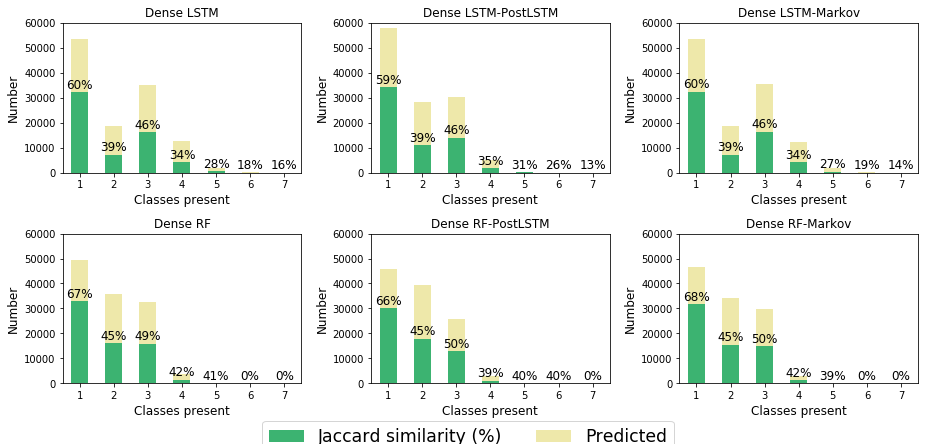

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data_frames = [Dense_LSTM, Dense_LSTM_PostLSTM, Dense_LSTM_Markov,
               Dense_RF, Dense_RF_PostLSTM, Dense_RF_Markov]

data_frame_names = ["Dense LSTM", "Dense LSTM-PostLSTM", "Dense LSTM-Markov",
                   "Dense RF", "Dense RF-PostLSTM", "Dense RF-Markov"]

# Calculate the number of rows and columns for the subplot grid
num_plots = len(data_frames)
num_rows = (num_plots + 1) // 3  # Round up to the nearest integer
num_cols = 3

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(13, 3 * num_rows))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

# Iterate over the DataFrames and create the plots
for i, df in enumerate(data_frames):
    
    orig_df = df
    data = df.copy()
    df = pd.DataFrame(data)
    
    # Mirror columns (instead of number of zero fractions, number of predicted classes)
    df = df.iloc[:, ::-1]
    
    # Select the current subplot
    ax = axs[i]
    
    colors = ['mediumseagreen', 'lightcoral']#, 'gainsboro']
#     colors = ['cornflowerblue','cornflowerblue']# 'navajowhite']#, 'gainsboro']
    colors = ['mediumseagreen', 'palegoldenrod']
    
    # Create the stacked bar chart
    df.set_index('Unnamed: 0', inplace=True)
    df.T.plot(kind='bar', stacked=True, ax=ax, color=colors)
    
    # Set the x-axis label and rotate the x-axis tick labels
    new_x_cols = ["1", "2", "3", "4", "5", "6", "7"]
#     ax.set_xticklabels(df.columns, rotation=0)
    ax.set_xticklabels(new_x_cols, rotation=0)
    
    # Set the y-axis label
    ax.set_xlabel('Classes present', fontsize = 'large')
    ax.set_ylabel('Number', fontsize = 'large')
    
    # Set the title of the plot
    ax.set_title(data_frame_names[i])
    
    ax.get_legend().remove()
    
    ax.set_ylim(0, 60000)
    
    # Again, but now plot the percentage Jaccard above
    data = orig_df.copy()
    df = pd.DataFrame(data)
    
    # Mirror columns (instead of number of zero fractions, number of predicted classes)
    df = df.iloc[:, ::-1]
    
    for x, y in enumerate(df.columns[:-1]):
        good = df.iloc[0, x]
        false = df.iloc[1, x]
        percentage = np.nan_to_num(good / (good + false), nan=0)
        height = (np.nan_to_num(good, nan=0)) + 200  # Adjust the vertical position of the labels
        ax.text(x, height, f'{percentage:.0%}', ha='center', va='bottom', fontsize = 'large')



# Remove any empty subplots if the number of plots is not a multiple of 3
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axs[-j - 1])

# Adjust the spacing between subplots
plt.tight_layout()

# Create a single legend for all the subplots and place it below the plots
handles, labels = ax.get_legend_handles_labels()
labels = ["Jaccard similarity (%)", "Predicted"]
legend = fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.04), fontsize='xx-large')

# Set the legend title (optional)
# legend.set_title("Legend", fontsize='xx-large')

plt.savefig('Plotting/Densejacc.png')

# Show the plots
plt.show()


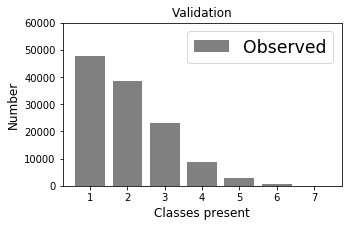

In [33]:
# Create bar plot of vali
vali = pd.read_csv('Plotting/Zero Good Calc/LSTM_zeros.csv')

# Only use correct and missed columns
vali = vali.iloc[:2, :]

# Vali distrbution is missed + correct predicted
vali = vali.sum(axis = 0).tolist()[1:]
vali = pd.DataFrame([vali])

# Mirror columns (instead of number of zero fractions, number of predicted classes)
vali = vali.iloc[:, ::-1]

plt.figure(figsize=(5, 3))

# Plotting the bar plot
colors = ['gray']
color=colors
plt.bar(new_x_cols, vali.iloc[0], color = colors)

# Adding labels and title
plt.xlabel('Classes present', fontsize = 'large')
plt.ylabel('Number', fontsize = 'large')
plt.title('Validation')

plt.ylim(0, 60000)

# Adding a legend outside on the right side
plt.legend(['Observed'], bbox_to_anchor=(1, 1), fontsize = 'xx-large')

plt.savefig('Plotting/Actualjacc.png')

# Display the plot
plt.show()